# 使用clip模型

In [1]:
import os
import cv2
import torch
import torchvision.transforms as transforms
import transformers
from transformers import CLIPProcessor, CLIPModel

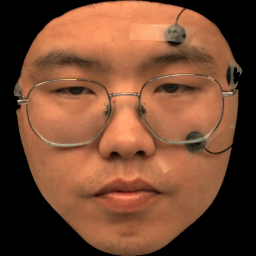

In [7]:
from PIL import Image  
image = Image.open("4.pics_selected_segmented_cropped_align/Micro/angry_liyan20230802_116_1.70_1.97_2.20/apex.png")  
image

In [11]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
 
# 加载预训练的CLIP模型和处理器
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
 
# 加载图像并进行预处理
image = Image.open("4.pics_selected_segmented_cropped_align/Micro/angry_liyan20230802_116_1.70_1.97_2.20/apex.png")
inputs = processor(images=image, return_tensors="pt")
 
# 提取图像特征
with torch.no_grad():
    image_features = model.get_image_features(**inputs)
 
# 打印图像特征
print(image_features)
print(image_features.shape) # torch.Size([1, 512])

tensor([[ 6.8700e-02, -1.6770e-01,  2.0672e-02,  2.4433e-02,  6.0396e-02,
         -2.4381e-01, -1.9215e-02,  3.8758e-01,  6.8091e-01, -2.2844e-01,
          4.6974e-01, -1.5500e-01, -4.6982e-02,  5.0843e-02,  7.1398e-02,
         -3.2612e-01,  5.9145e-01,  3.2843e-01,  2.6567e-02, -3.5728e-01,
         -2.1280e-01,  4.7141e-01, -8.8732e-01,  1.1949e-01, -9.6485e-02,
          8.9309e-02,  2.5352e-02,  1.5893e-02,  2.4470e-01, -1.4873e-01,
          2.5163e-01, -1.5459e-02,  2.5671e-03,  5.3412e-01,  4.6598e-01,
          1.6316e-01, -2.4226e-01,  3.1617e-01,  3.4326e-02, -1.0001e+00,
         -4.2881e-01,  6.5482e-02, -3.9403e-01, -9.1738e-02, -3.3768e-02,
          1.8582e+00, -3.1839e-01,  5.2055e-02, -1.4531e-01, -3.8795e-01,
          6.9180e-01,  5.9100e-01,  2.4274e-01, -4.2069e-01, -3.7692e-01,
         -7.4661e-02, -2.7278e-01, -2.7504e-01,  3.3812e-01,  4.3260e-01,
          8.4237e-01, -7.4989e-01,  6.6573e-01, -7.1975e-02, -1.3010e-01,
         -5.4418e-01, -4.8662e-01,  1.

# 脑电特征

In [13]:
import os

# 获取data目录下的所有文件和文件夹
name_paths = os.listdir('features_by_py/')
print('name_paths:', name_paths)

name_paths: ['01_7.17wangzishan_eeg_psd_fea.mat', '02_7.18mayiran_eeg_psd_fea.mat', '03_7.18wangxiaomin_eeg_psd_fea.mat', '04_7.18zhengwansheng_eeg_psd_fea.mat', '05_7.19linjiaying_eeg_psd_fea.mat', '06_7.19wangjintao_eeg_psd_fea.mat', '07_7.19wangsixian_eeg_psd_fea.mat', '08_7.20lizhuoru_eeg_psd_fea.mat', '09_7.20shitianyang_eeg_psd_fea.mat', '10_7.20yuelu_eeg_psd_fea.mat', '11_7.21hantianhao_eeg_psd_fea.mat', '12_7.21wujinghan_eeg_psd_fea.mat', '13_7.21zhangdi_eeg_psd_fea.mat', '14_7.27wangxinyi_eeg_psd_fea.mat', '15_7.27wangziheng_eeg_psd_fea.mat', '16_7.28liuhaoyu_eeg_psd_fea.mat', '17_7.28yangmi_eeg_psd_fea.mat', '18_7.28zhengchangyan_eeg_psd_fea.mat', '19_7.31qiangweihua_eeg_psd_fea.mat', '20_7.31shengxin_eeg_psd_fea.mat', '21_7.31yansen_eeg_psd_fea.mat', '22_8.1wangsen_eeg_psd_fea.mat', '23_8.1zhangbuyuan_eeg_psd_fea.mat', '24_8.1zhaoshaohua_eeg_psd_fea.mat', '25_8.2fengdengfang_eeg_psd_fea.mat', '26_8.2liyan_eeg_psd_fea.mat', '27_8.2wangshuai_eeg_psd_fea.mat', '28_8.2xietao_eeg

In [14]:
import numpy as np
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

X = []
Ye = []
Ys = []

for sub in range(len(name_paths)):
    data = loadmat(os.path.join('features_by_py', name_paths[sub]))
    Xpsd = data['Xpsd']
    Yemo = data['Yemo']
    Ysub = data['Ysub']
    # 使用ravel()函数将其转换为一维数组
    Yemo = Yemo.ravel()

    # 创建SVM分类器对象
#     clf = SVC(kernel='linear')
#     # 使用10折交叉验证计算准确率
#     accuracy = cross_val_score(clf, Xpsd, Yemo, cv=5).mean()

#     print("Accuracy:", accuracy)
#     print('Yemo:', Yemo)

    X.append(Xpsd)
    Ye.append(Yemo)
    Ys.append(Ysub)

X = np.concatenate(X, axis=0)
Ye = np.concatenate(Ye, axis=0)
Ys = np.concatenate(Ys, axis=0)

In [19]:
print(f'X.shape: {X.shape}')
print(f'Ye.shape: {Ye.shape}')
print(f'Ys.shape: {Ys.shape}')

X.shape: (1533, 300)
Ye.shape: (1533,)
Ys.shape: (1533, 1)


# 实验结果

In [2]:
import openpyxl
import numpy as np
from openpyxl import load_workbook
from openpyxl.utils import FORMULAE
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
filename = r'E:\10.Doctoral materials\0.Micro-expression\3.papers\results.xlsx'
sheetname = "data"

In [4]:
def read_excel_data(filename, sheetname, start_row, end_row, start_column, end_column):
    workbook = load_workbook(filename, data_only=True)
    sheet = workbook[sheetname]

    data = []
    for row in sheet.iter_rows(min_row=start_row, max_row=end_row,
                               min_col=start_column, max_col=end_column):
        row_data = []
        for cell in row:
            if cell.data_type == 'f' and cell.value in FORMULAE:
                cell.value = cell.value
            else:
                cell.value = cell.value
            row_data.append(cell.value)
        data.append(row_data)

    return np.array(data)

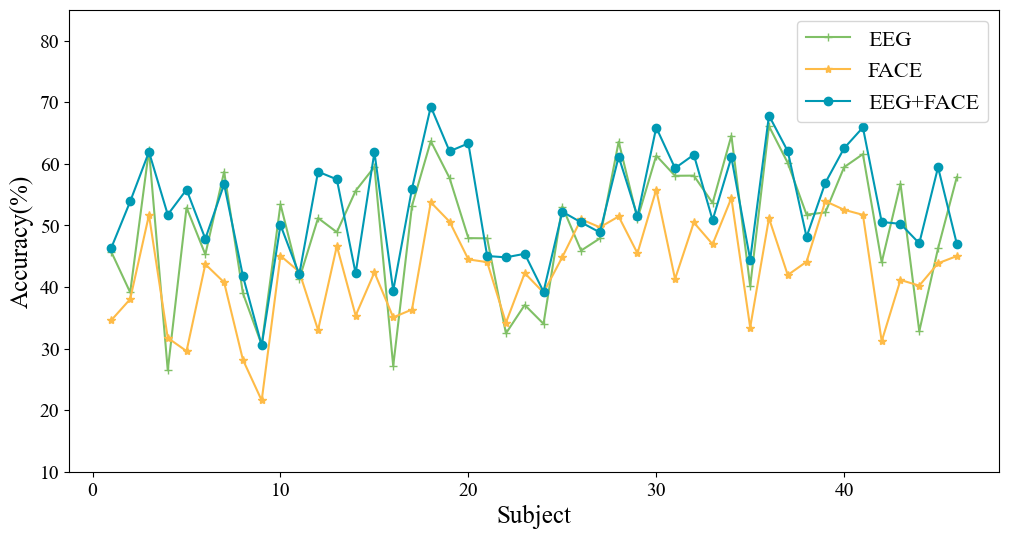

In [9]:
EEG_array = read_excel_data(filename, sheetname, 2, 47, 2, 2)*100
FACE_array = read_excel_data(filename, sheetname, 2, 47, 3, 3)*100
EEG_FACE_array = read_excel_data(filename, sheetname, 2, 47, 4, 4)*100

x_values = list(range(1, len(EEG_FACE_array) + 1))

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(x_values, EEG_array, label='EEG', marker='+', color=plt.cm.summer(0.5))
plt.plot(x_values, FACE_array, label='FACE', marker='*', color=plt.cm.YlOrBr(0.4))
plt.plot(x_values, EEG_FACE_array, label='EEG+FACE', marker='o', color=plt.cm.winter(0.6))

plt.ylim(10, 85)
plt.tick_params(axis='both', labelsize=14)  # 这里可以调整字体大小
plt.xlabel('Subject', fontsize=18)
plt.ylabel('Accuracy(%)', fontsize=18)
plt.legend(fontsize=16)
# 保存图表并设置dpi
plt.savefig(r'E:\10.Doctoral materials\0.Micro-expression\3.papers\plot.png', dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

In [5]:
eeg_std = read_excel_data(filename, sheetname, 59, 59, 2, 9)
eeg_std = eeg_std.flatten().tolist()
face_std = read_excel_data(filename, sheetname, 60, 60, 2, 9)
face_std = face_std.flatten().tolist()
eeg_face_std = read_excel_data(filename, sheetname, 61, 61, 2, 9)
eeg_face_std = eeg_face_std.flatten().tolist()
eeg_face_std

[0.0464, 0.0592, 0.034, 0.0469, 0.0272, 0.066, 0.0487, 0.038]

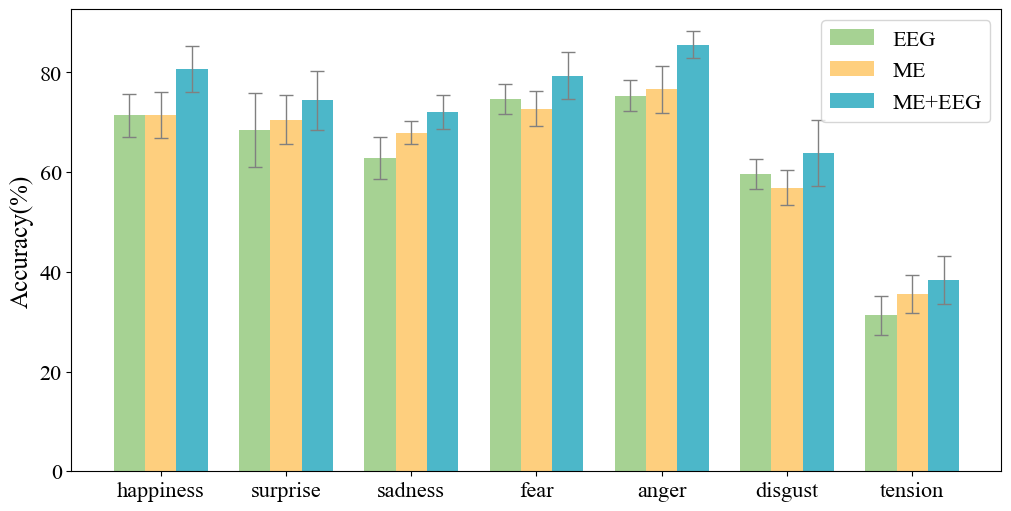

In [6]:
import matplotlib.pyplot as plt

# 数据
# emotions = ['happiness', 'surprise', 'sadness', 'fear', 'anger', 'disgust', 'tension', 'calmness']
emotions = ['happiness', 'surprise', 'sadness', 'fear', 'anger', 'disgust', 'tension']

eeg_scores = read_excel_data(filename, sheetname, 54, 54, 2, 8)*100
eeg_scores = eeg_scores.flatten().tolist()
face_scores = read_excel_data(filename, sheetname, 55, 55, 2, 8)*100
face_scores = face_scores.flatten().tolist()
eeg_face_scores = read_excel_data(filename, sheetname, 56, 56, 2, 8)*100
eeg_face_scores = eeg_face_scores.flatten().tolist()

eeg_std = read_excel_data(filename, sheetname, 59, 59, 2, 8)*100
eeg_std = eeg_std.flatten().tolist()
face_std = read_excel_data(filename, sheetname, 60, 60, 2, 8)*100
face_std = face_std.flatten().tolist()
eeg_face_std = read_excel_data(filename, sheetname, 61, 61, 2, 8)*100
eeg_face_std = eeg_face_std.flatten().tolist()

# 设置柱状图的宽度
bar_width = 0.25

# 设置柱状图的位置
index = range(len(emotions))
eeg_positions = [i for i in index]
face_positions = [i + bar_width for i in index]
eeg_face_positions = [i + 2 * bar_width for i in index]

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(eeg_positions, eeg_scores, yerr=eeg_std, align='center', alpha=0.7, width=bar_width, label='EEG', color=plt.cm.summer(0.5), capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})
plt.bar(face_positions, face_scores, yerr=face_std, align='center', alpha=0.7, width=bar_width, label='ME', color=plt.cm.YlOrBr(0.4), capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})
plt.bar(eeg_face_positions, eeg_face_scores, yerr=eeg_face_std, align='center', alpha=0.7, width=bar_width, label='ME+EEG', color=plt.cm.winter(0.6), capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})

# 设置x轴标签和标题
plt.xticks([i + bar_width for i in index], emotions)
plt.tick_params(axis='both', labelsize=16) 
# plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Accuracy(%)', fontsize=18)
# 添加图例
plt.legend(fontsize=16)

plt.savefig(r'E:\10.Doctoral materials\0.Micro-expression\3.papers\bar.png', dpi=800, bbox_inches='tight')
# 显示图形
plt.show()

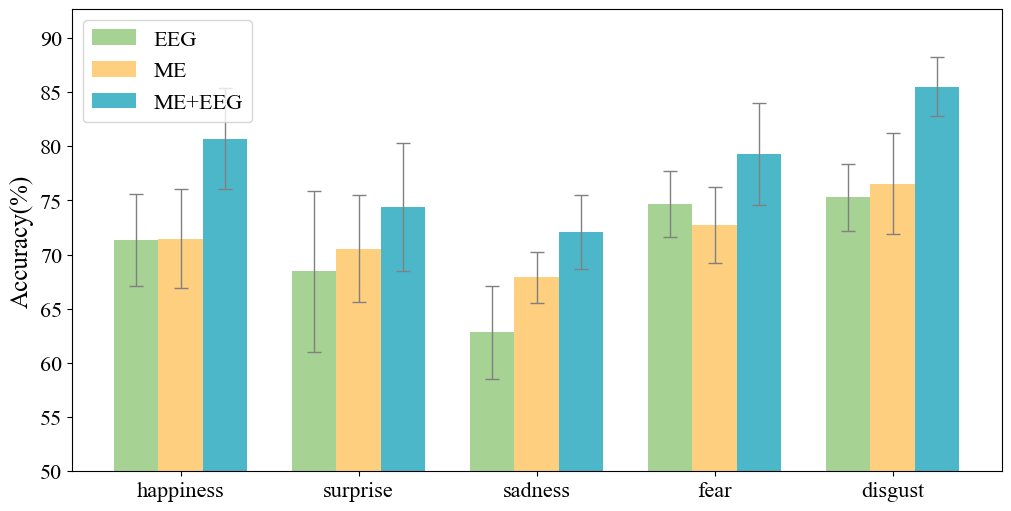

In [7]:
import matplotlib.pyplot as plt

# 数据
# emotions = ['happiness', 'surprise', 'sadness', 'fear', 'anger', 'disgust', 'tension', 'calmness']
emotions = ['happiness', 'surprise', 'sadness', 'fear', 'disgust']

eeg_scores = read_excel_data(filename, sheetname, 54, 54, 2, 6)*100
eeg_scores = eeg_scores.flatten().tolist()
face_scores = read_excel_data(filename, sheetname, 55, 55, 2, 6)*100
face_scores = face_scores.flatten().tolist()
eeg_face_scores = read_excel_data(filename, sheetname, 56, 56, 2, 6)*100
eeg_face_scores = eeg_face_scores.flatten().tolist()

eeg_std = read_excel_data(filename, sheetname, 59, 59, 2, 6)*100
eeg_std = eeg_std.flatten().tolist()
face_std = read_excel_data(filename, sheetname, 60, 60, 2, 6)*100
face_std = face_std.flatten().tolist()
eeg_face_std = read_excel_data(filename, sheetname, 61, 61, 2, 6)*100
eeg_face_std = eeg_face_std.flatten().tolist()

# 设置柱状图的宽度
bar_width = 0.25

# 设置柱状图的位置
index = range(len(emotions))
eeg_positions = [i for i in index]
face_positions = [i + bar_width for i in index]
eeg_face_positions = [i + 2 * bar_width for i in index]

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(eeg_positions, eeg_scores, yerr=eeg_std, align='center', alpha=0.7, width=bar_width, label='EEG', color=plt.cm.summer(0.5), capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})
plt.bar(face_positions, face_scores, yerr=face_std, align='center', alpha=0.7, width=bar_width, label='ME', color=plt.cm.YlOrBr(0.4), capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})
plt.bar(eeg_face_positions, eeg_face_scores, yerr=eeg_face_std, align='center', alpha=0.7, width=bar_width, label='ME+EEG', color=plt.cm.winter(0.6), capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})

# 设置x轴标签和标题
plt.xticks([i + bar_width for i in index], emotions)
plt.tick_params(axis='both', labelsize=16) 
# plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Accuracy(%)', fontsize=18)

# 设置y轴从40开始
plt.ylim(50, plt.gca().get_ylim()[1])

# 添加图例
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=16)


plt.savefig(r'E:\10.Doctoral materials\0.Micro-expression\3.papers\bar.png', dpi=800, bbox_inches='tight')
# 显示图形
plt.show()


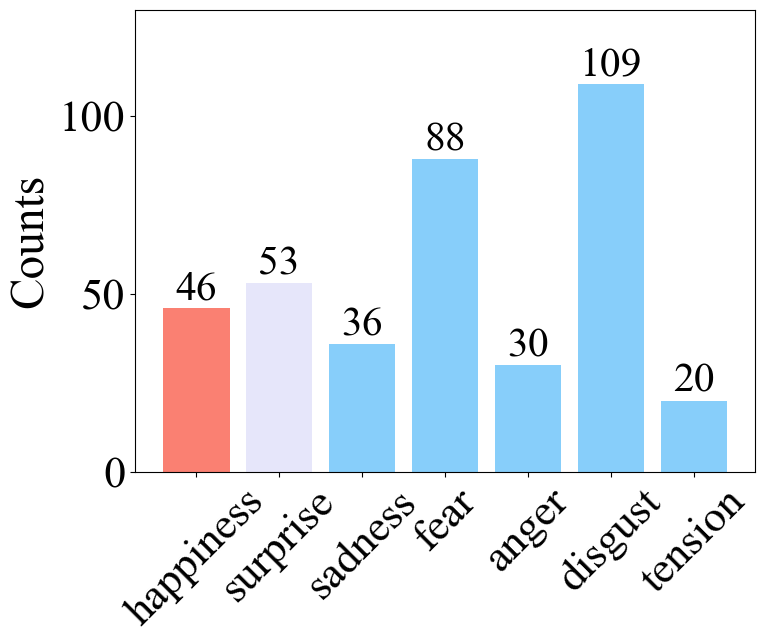

In [8]:
import matplotlib.pyplot as plt
import numpy as np

emotions = ['happiness', 'surprise', 'sadness', 'fear', 'anger', 'disgust', 'tension']
counts = read_excel_data(filename, sheetname, 87, 93, 5, 5)
counts = np.round(counts).flatten()

# 为每种情绪指定不同的颜色
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'salmon', 'lightpink', 'lavender']
colors = ['salmon', 'lavender', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue']

# 创建图形和轴
fig, ax = plt.subplots(figsize=(8, 6))  # 宽度为10英寸，高度为6英寸
# 绘制柱状图
bars = ax.bar(emotions, counts, color=colors)

# 设置坐标轴上文字的大小
ax.tick_params(axis='both', which='major', labelsize=32)  # 设置坐标轴刻度标签的大小

# 在柱状图上添加数值标签
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=30)
    
# 设置纵坐标的数据范围
ax.set_ylim(0, 130)  # 设置y轴的最小值为0，最大值为150
# 设置横坐标类别标签的倾斜角度
plt.xticks(rotation=45)  # 将x轴标签旋转45度

# 设置轴标签和标题
ax.set_ylabel('Counts', fontsize=34)
# ax.set_title('Emotion Counts', fontsize=30)

# 显示图形
plt.show()

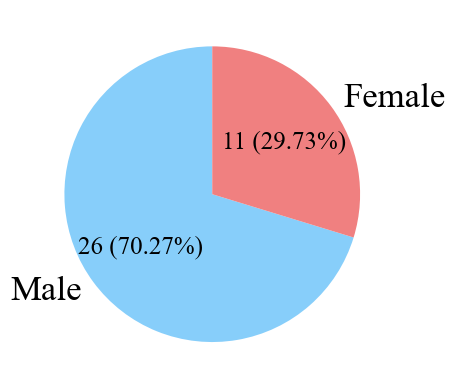

In [296]:
import matplotlib.pyplot as plt

# 创建数据
gender_counts = [26, 11]  # 男性和女性人数
gender_labels = ['Male', 'Female']  # 性别标签
gender_colors = ['lightskyblue', 'lightcoral']  # 为男性和女性设置颜色

# 创建图形和轴
fig, ax = plt.subplots()

# 定义autopct参数的格式，显示人数，比例放在括号内
def autopct_format(pct):
    total = sum(gender_counts)
    val = int(round(pct*total/100.0))
    return f'{val} ({pct:.2f}%)'

# 绘制饼状图，同时显示人数和比例
wedges, texts, autotexts = ax.pie(gender_counts, labels=gender_labels, autopct=autopct_format, startangle=90, colors=gender_colors)

# 设置饼状图的标题
# ax.set_title('Gender Distribution', fontsize=20)
for text in texts:
    text.set_fontsize(25)
    
for autotext in autotexts:
    autotext.set_fontsize(18)  # 设置百分比数字的大小

# 显示图形
plt.show()

# PPG+RSP+EDA+MEs

In [3]:
import openpyxl
import numpy as np
from openpyxl import load_workbook
from openpyxl.utils import FORMULAE
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

In [28]:
filename = r'E:\10.Doctoral materials\0.Micro-expression\3.papers\PPG+RSP+EDA+MEs\results.xlsx'
sheetname = "data"

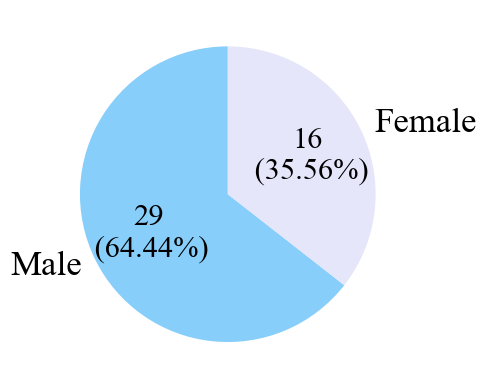

In [11]:
import matplotlib.pyplot as plt

# 创建数据
gender_counts = [29, 16]  # 男性和女性人数
gender_labels = ['Male', 'Female']  # 性别标签
gender_colors = ['lightskyblue', 'lavender']  # 为男性和女性设置颜色

# 创建图形和轴
fig, ax = plt.subplots()

# 定义autopct参数的格式，显示人数，比例放在括号内
def autopct_format(pct):
    total = sum(gender_counts)
    val = int(round(pct*total/100.0))
    return f'{val}\n ({pct:.2f}%)'

# 绘制饼状图，同时显示人数和比例
wedges, texts, autotexts = ax.pie(gender_counts, labels=gender_labels, autopct=autopct_format, startangle=90, colors=gender_colors)

# 设置饼状图的标题
# ax.set_title('Gender Distribution', fontsize=20)
for text in texts:
    text.set_fontsize(25)
    
for autotext in autotexts:
    autotext.set_fontsize(22)  # 设置百分比数字的大小

# 显示图形
plt.show()

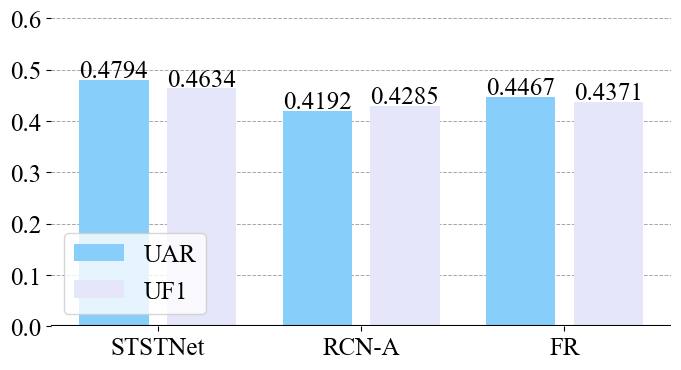

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ['STSTNet', 'RCN-A', 'FR']
UAR_values = [0.4794, 0.4192, 0.4467]
UF1_values = [0.4634, 0.4285, 0.4371]

# 设置柱状图的宽度
bar_width = 0.3  # 柱子宽度
bar_gap = 0.08   # 同一类别柱子之间的间距
category_gap = 0.5  # 不同类别之间的间距

# 创建图形和轴
fig, ax = plt.subplots(figsize=(8, 4))

# 设置纵坐标的范围为0到0.6
ax.set_ylim(0, 0.6)

# 去掉边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 添加几条水平线
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
ax.set_axisbelow(True)

# 设置坐标轴上文字的大小
ax.tick_params(axis='both', which='major', labelsize=18)

# 绘制横轴线在纵坐标为0的位置
ax.axhline(y=0, color='black', linestyle='-')

# 设置柱状图的位置
index_UAR = np.arange(len(models)) * (bar_width + bar_gap + category_gap)
index_UF1 = index_UAR + bar_width + bar_gap

# 绘制柱状图并添加数值标签
plt.bar(index_UAR, UAR_values, width=bar_width, label='UAR', color='lightskyblue')
for i, v in enumerate(UAR_values):
    ax.text(index_UAR[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=18)

plt.bar(index_UF1, UF1_values, width=bar_width, label='UF1', color='lavender')
for i, v in enumerate(UF1_values):
    ax.text(index_UF1[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=18)

# 添加图例
plt.legend(fontsize=18)

# 设置x轴刻度标签
plt.xticks(index_UAR + (bar_width + bar_gap) / 2, models)

# 显示图形
plt.show()

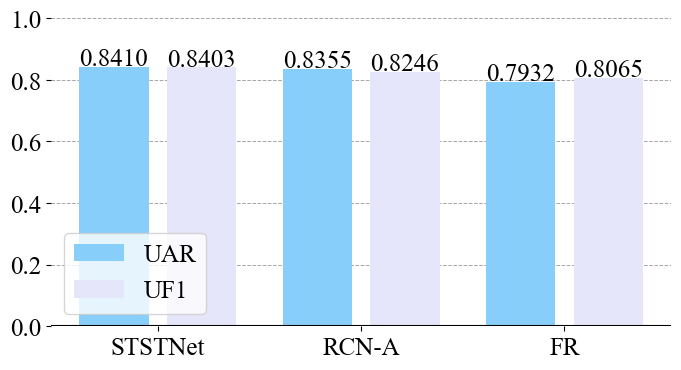

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ['STSTNet', 'RCN-A', 'FR']
UAR_values = [0.8410, 0.8355, 0.7932]
UF1_values = [0.8403, 0.8246, 0.8065]

# 设置柱状图的宽度
bar_width = 0.3  # 柱子宽度
bar_gap = 0.08   # 同一类别柱子之间的间距
category_gap = 0.5  # 不同类别之间的间距

# 创建图形和轴
fig, ax = plt.subplots(figsize=(8, 4))

# 设置纵坐标的范围为0到0.6
ax.set_ylim(0, 1.0)

# 去掉边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 添加几条水平线
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
ax.set_axisbelow(True)

# 设置坐标轴上文字的大小
ax.tick_params(axis='both', which='major', labelsize=18)

# 绘制横轴线在纵坐标为0的位置
ax.axhline(y=0, color='black', linestyle='-')

# 设置柱状图的位置
index_UAR = np.arange(len(models)) * (bar_width + bar_gap + category_gap)
index_UF1 = index_UAR + bar_width + bar_gap

# 绘制柱状图并添加数值标签
plt.bar(index_UAR, UAR_values, width=bar_width, label='UAR', color='lightskyblue')
for i, v in enumerate(UAR_values):
    ax.text(index_UAR[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=18)

plt.bar(index_UF1, UF1_values, width=bar_width, label='UF1', color='lavender')
for i, v in enumerate(UF1_values):
    ax.text(index_UF1[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=18)

# 添加图例
plt.legend(fontsize=18)

# 设置x轴刻度标签
plt.xticks(index_UAR + (bar_width + bar_gap) / 2, models)

# 显示图形
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29816\1482196504.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


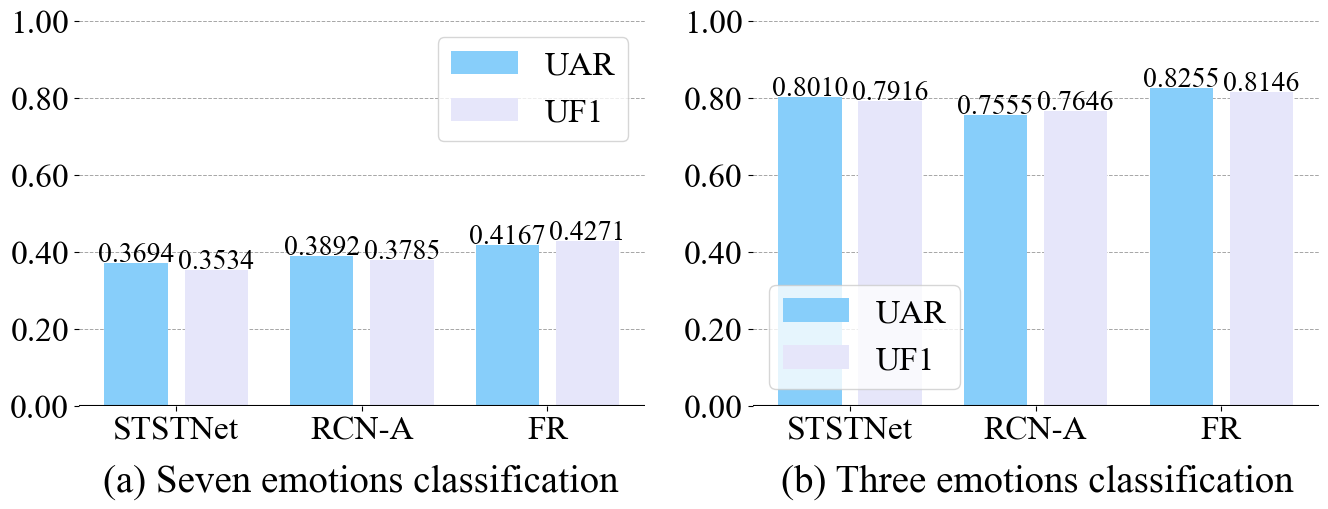

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data
models = ['STSTNet', 'RCN-A', 'FR']
UAR_values_1 = [0.3694, 0.3892, 0.4167]
UF1_values_1 = [0.3534, 0.3785, 0.4271]
UAR_values_2 = [0.8010, 0.7555, 0.8255]
UF1_values_2 = [0.7916, 0.7646, 0.8146]

# Settings for the bar chart width
bar_width = 0.3  # Width of the bars
bar_gap = 0.08   # Spacing between bars of the same category
category_gap = 0.5  # Spacing between different categories

# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'wspace': 0.19})

# ---- First subplot ----
ax1.set_ylim(0.0, 1.0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
ax1.set_axisbelow(True)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.axhline(y=0, color='black', linestyle='-')

# Set the position of the bar chart
index_UAR_1 = np.arange(len(models)) * (bar_width + bar_gap + category_gap)
index_UF1_1 = index_UAR_1 + bar_width + bar_gap

# Draw the first subplot's bar chart and add value labels
ax1.bar(index_UAR_1, UAR_values_1, width=bar_width, label='UAR', color='lightskyblue')
for i, v in enumerate(UAR_values_1):
    ax1.text(index_UAR_1[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=20)

ax1.bar(index_UF1_1, UF1_values_1, width=bar_width, label='UF1', color='lavender')
for i, v in enumerate(UF1_values_1):
    ax1.text(index_UF1_1[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=20)

ax1.legend(fontsize=24)
ax1.set_xticks(index_UAR_1 + (bar_width + bar_gap) / 2)
ax1.set_xticklabels(models)

# Format y-axis ticks to show two decimal places
formatter = FuncFormatter(lambda y, _: f'{y:.2f}')
ax1.yaxis.set_major_formatter(formatter)

# ---- Second subplot ----
ax2.set_ylim(0.0, 1.0)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
ax2.set_axisbelow(True)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax2.axhline(y=0, color='black', linestyle='-')

# Set the position of the bar chart
index_UAR_2 = np.arange(len(models)) * (bar_width + bar_gap + category_gap)
index_UF1_2 = index_UAR_2 + bar_width + bar_gap

# Draw the second subplot's bar chart and add value labels
ax2.bar(index_UAR_2, UAR_values_2, width=bar_width, label='UAR', color='lightskyblue')
for i, v in enumerate(UAR_values_2):
    ax2.text(index_UAR_2[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=20)

ax2.bar(index_UF1_2, UF1_values_2, width=bar_width, label='UF1', color='lavender')
for i, v in enumerate(UF1_values_2):
    ax2.text(index_UF1_2[i], v + 0.005, f'{v:.4f}', ha='center', fontsize=20)

ax2.legend(fontsize=24)
ax2.set_xticks(index_UAR_2 + (bar_width + bar_gap) / 2)
ax2.set_xticklabels(models)

ax2.yaxis.set_major_formatter(formatter)

# Adjust layout and display the figure
plt.tight_layout()

# Add a title at the bottom of the figure
fig.text(0.301, -0.06, '(a) Seven emotions classification', ha='center', fontsize=28, color='black')
fig.text(0.724, -0.06, '(b) Three emotions classification', ha='center', fontsize=28, color='black')

plt.show()

In [15]:
def read_excel_data(filename, sheetname, start_row, end_row, start_column, end_column):
    workbook = load_workbook(filename, data_only=True)
    sheet = workbook[sheetname]

    data = []
    for row in sheet.iter_rows(min_row=start_row, max_row=end_row,
                               min_col=start_column, max_col=end_column):
        row_data = []
        for cell in row:
            if cell.data_type == 'f' and cell.value in FORMULAE:
                cell.value = cell.value
            else:
                cell.value = cell.value
            row_data.append(cell.value)
        data.append(row_data)

    return np.array(data)

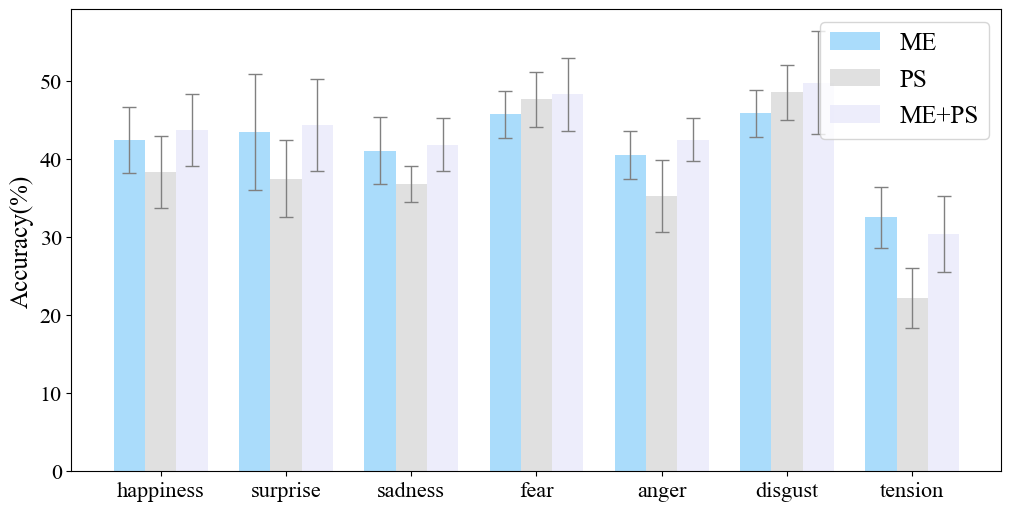

In [29]:
import matplotlib.pyplot as plt

# 数据
# emotions = ['happiness', 'surprise', 'sadness', 'fear', 'anger', 'disgust', 'tension', 'calmness']
emotions = ['happiness', 'surprise', 'sadness', 'fear', 'anger', 'disgust', 'tension']

eeg_scores = read_excel_data(filename, sheetname, 52, 52, 2, 8)*100
eeg_scores = eeg_scores.flatten().tolist()
face_scores = read_excel_data(filename, sheetname, 53, 53, 2, 8)*100
face_scores = face_scores.flatten().tolist()
eeg_face_scores = read_excel_data(filename, sheetname, 54, 54, 2, 8)*100
eeg_face_scores = eeg_face_scores.flatten().tolist()

eeg_std = read_excel_data(filename, sheetname, 57, 57, 2, 8)*100
eeg_std = eeg_std.flatten().tolist()
face_std = read_excel_data(filename, sheetname, 58, 58, 2, 8)*100
face_std = face_std.flatten().tolist()
eeg_face_std = read_excel_data(filename, sheetname, 59, 59, 2, 8)*100
eeg_face_std = eeg_face_std.flatten().tolist()

# 设置柱状图的宽度
bar_width = 0.25

# 设置柱状图的位置
index = range(len(emotions))
eeg_positions = [i for i in index]
face_positions = [i + bar_width for i in index]
eeg_face_positions = [i + 2 * bar_width for i in index]

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(eeg_positions, eeg_scores, yerr=eeg_std, align='center', alpha=0.7, width=bar_width, label='ME', color='lightskyblue', capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})
plt.bar(face_positions, face_scores, yerr=face_std, align='center', alpha=0.7, width=bar_width, label='PS', color='lightgray', capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})
plt.bar(eeg_face_positions, eeg_face_scores, yerr=eeg_face_std, align='center', alpha=0.7, width=bar_width, label='ME+PS', color='lavender', capsize=5, error_kw={'ecolor': 'gray', 'elinewidth': 1})

# 设置x轴标签和标题
plt.xticks([i + bar_width for i in index], emotions)
plt.tick_params(axis='both', labelsize=16) 
# plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Accuracy(%)', fontsize=18)
# 添加图例
plt.legend(fontsize=18)

plt.savefig(r'E:\10.Doctoral materials\0.Micro-expression\3.papers\PPG+RSP+EDA+MEs\PICS\bar2.png', dpi=800, bbox_inches='tight')
# 显示图形
plt.show()